<a href="https://colab.research.google.com/github/FinLZ/NEUR265_Zakas/blob/main/coding_homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #6

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw6.csv</code>, <code>acc_fa_hw6.csv</code>, <code>lc_hits_hw6.csv</code>, and <code>lc_fa_hw6.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code>, <code>acc_fa</code>, <code>lc_hits</code>, and <code>lc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array.

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex, and both your <code>lc_hits</code> and <code>lc_fa</code> arrays consist of LFP data simultaneously recorded from the mouse locus coeruleus (an area in the brainstem with neurons that produce the neurotransmitter norepinephrine). Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). Similarly to last week, the task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> and <code>lc_hits</code> variables contain LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> and <code>lc_fa</code> variables contain LFP surrounding these false alarms. So, you have four arrays - two arrays with LFP recorded during correct choices (hits), and two arrays with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as your four arrays, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_hits</code> in the same plot in <font color = 'blue'>blue</font> in one subplot. In a second subplot, plot the first trial of <code>acc_fa</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_fa</code> in <font color = 'blue'>blue</font>. Put time on the x-axis of both of your subplots. Label the axes of your subplots.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation in the ACC LFP might be, and what the dominant oscillation in the locus coeruleus (LC) LFP might be. Are the two different? By visual inspection, do you notice any relationship between the two brain areas during the "hit" you plotted, or the "false alarm" you plotted? Recall from our notebook on phase coherence that sometimes the peaks and troughs of two oscillations have a consistent relationship across time. Is there any evidence of this in the raw LFP?

10. In a new *Code Cell*, compute the coherence for <code>acc_hits</code> and <code>lc_hits</code>. Make sure to follow the steps in the "Computing the Coherence" section of our notebook from last week. The end result should be a plot with "Frequency (Hz)" on the x-axis, and "Coherence" on the y-axis. Label your axes.

11. In a new *Markdown Cell*, describe your results. In which frequency band is there the most phase coherence during hits?

12. In a new *Code Cell*, repeat step 10, but with <code>acc_fa</code> and <code>lc_fa</code>. Plot the results from step 10 in <font color = 'red'>red</font>, and the results from this step in <font color = 'blue'>blue</font>, in the same plot (in other words, you should have one plot, with two different lines on it - one will be the coherence for "hits" that you calculated in step 10, and one will be the coherence for "false alarms"). Label your axes.

13. In a new *Markdown Cell*, intepret your plot from step 12. Is the frequency at which coherence is strongest different between hits and false alarms? Is coherence higher/lower during hits vs. false alarms? If higher coherence means more communication between the ACC and LC, are these two brain areas talking to each more or less during hits vs. false alarms?

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_6.ipynb</code>.





### Fin Zakas
_NEUR 265: Intro to Neural Data Analysis_

**4/6/2023**

In [2]:
#import relevant modules
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import acc_hits, acc_fa, lc_hits, lc_fa
acc_hits = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/acc_hits_hw6.csv', delimiter = ',')
acc_fa = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/acc_fa_hw6.csv', delimiter = ',')
lc_hits = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/lc_hits_hw6.csv', delimiter = ',')
lc_fa = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/lc_fa_hw6.csv', delimiter = ',')

In [4]:
#print shape of each array
print(np.shape(acc_hits))
print(np.shape(acc_fa))
print(np.shape(lc_hits))
print(np.shape(lc_fa))

(20, 8001)
(28, 8001)
(20, 8001)
(28, 8001)


In [5]:
#Create a variable time
time = np.linspace(0,4,8001)

In [6]:
#determine sampling rate
sr = len(time) / 4
sr

2000.25

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Voltage')]

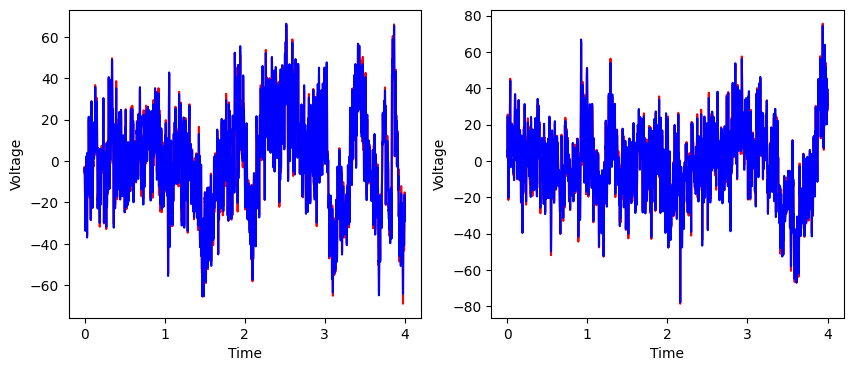

In [7]:
#plot first trial of acc_hits and lc_hits in one subplot, first trial of acc_fa and lc_fa in another
fig,ax = plt.subplots(1,2, figsize = (10,4))
ax[0].plot(time, acc_hits[0], color = 'red')
ax[0].plot(time, lc_hits[0], color = 'blue')
ax[0].set(xlabel = 'Time', ylabel = 'Voltage')

ax[1].plot(time, acc_fa[0], color = 'red')
ax[1].plot(time, lc_fa[0], color = 'blue')
ax[1].set(xlabel = 'Time', ylabel = 'Voltage')

Determining dominant oscillation is difficult in these figures. But for acc / lc hits it seems to be 2-4Hz. For acc/lc fa it seems to be 3-5Hz. In both hits and false alarms, the ACC and LC seem to have a consistent relationship. As evidenced by the almost invisibility of the ACC plots, LFPs for ACC and LC vary together across time.

Text(0.5, 1.0, 'Coherence between two electrodes')

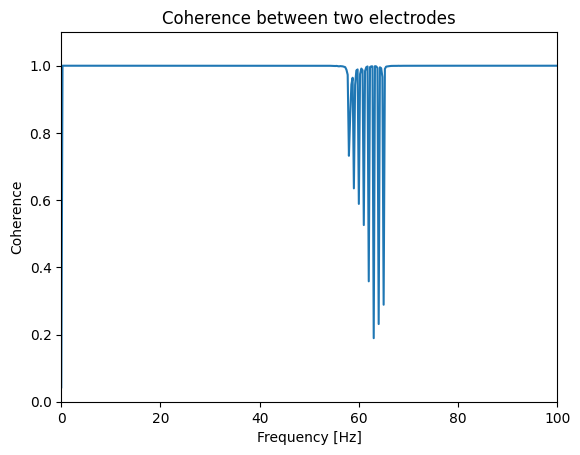

In [25]:
#Compute coherence for acc_hits and lc_hits

dt = time[1] - time[0]
N = acc_hits.shape[1]

# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in acc_hits])
yf = np.array([np.fft.rfft(y - y.mean()) for y in lc_hits])

# Compute the spectra
T = time[-1]
scale = 2 * dt**2 / T
Sxx = scale * (xf * xf.conj()).mean(0) 
Syy = scale * (yf * yf.conj()).mean(0) 
Sxy = scale * (xf * yf.conj()).mean(0)  

# Compute the coherence.
cohr = np.abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, cohr.real)                      # Plot coherence vs frequency,
plt.xlim([0, 100])                           # ... in a chosen frequency range,
plt.ylim([0, 1.1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')

For hits, there is full coherence from 0 to ~55Hz and beyond ~65 Hz. Within the 55-65Hz band it dips rapidly between full coherence and low coherence.

Text(0.5, 1.0, 'Coherence between two electrodes')

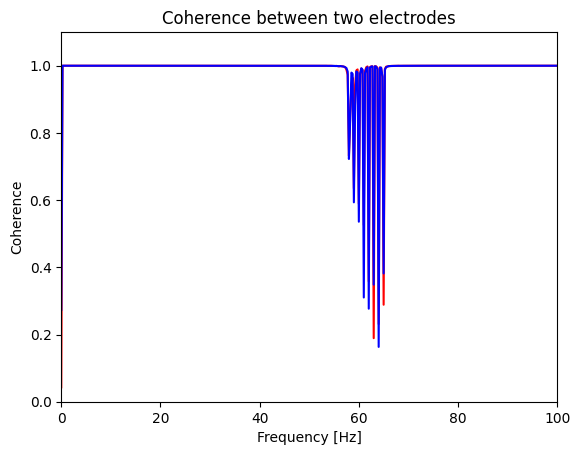

In [26]:
#Compute coherence for acc_fa and lc_fa in blue, and coherence from previous step in red

dt_fa = time[1] - time[0]
N_fa = acc_fa.shape[1]

# Compute the Fourier transforms
xf_fa = np.array([np.fft.rfft(x - x.mean()) for x in acc_fa])
yf_fa = np.array([np.fft.rfft(y - y.mean()) for y in lc_fa])

# Compute the spectra
T = time[-1]
scale_fa = 2 * dt**2 / T
Sxx_fa = scale * (xf_fa * xf_fa.conj()).mean(0)  
Syy_fa = scale * (yf_fa * yf_fa.conj()).mean(0)  
Sxy_fa = scale * (xf_fa * yf_fa.conj()).mean(0) 

# Compute the coherence.
cohr_fa = np.abs(Sxy_fa) / (np.sqrt(Sxx_fa) * np.sqrt(Syy_fa))

f_fa = np.fft.rfftfreq(N_fa, dt_fa)                     # Define a frequency axis.
plt.plot(f, cohr.real, color = 'red')
plt.plot(f_fa, cohr_fa.real, color = 'blue')                      # Plot coherence vs frequency,
plt.xlim([0, 100])                           # ... in a chosen frequency range,
plt.ylim([0, 1.1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')

Coherence for both hits and fa are almost identical. With hits having slightly lower coherence at ~62 and ~64 Hz and false alarms having slightly lower coherence at ~63 Hz. This suggests that in both instances of a hit and of a false alarm, the ACC and LC are communicating with each other the same high amount.